In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# 1. Gather Data

In [9]:
# Read in training and testing data using
data = pd.read_csv("Employee.csv")

# See a sample of the dataset
data.sample(20)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
2209,PHD,2017,New Delhi,3,29,Male,No,1,0
1411,Bachelors,2017,Pune,3,26,Male,No,4,0
4363,Bachelors,2016,Bangalore,3,24,Male,No,2,0
4599,Bachelors,2013,Bangalore,3,36,Male,No,0,0
2901,Bachelors,2013,Bangalore,3,27,Male,Yes,5,0
2977,Masters,2013,Pune,1,30,Male,No,1,0
1913,Masters,2017,New Delhi,2,25,Female,No,3,0
1519,Bachelors,2014,Bangalore,3,27,Male,No,5,0
2650,Bachelors,2015,Bangalore,1,29,Male,No,4,0
1370,Bachelors,2013,Bangalore,3,28,Female,No,3,0


### Feature type summary:


| Feature Type |   |   |   |   ||
|  ----  | ----  | ----  | ----  | ----  |----  |
| Continuous Features| Age (Continuous) | JoiningYear (Continuous)||
| Categorical Features| Education | Payment Tire | Gender | Leave or not |ExperienceInCurrentDomain|
| Alphanumeric Features| City| Education| | |

# 2. Data Cleaning
There are 4 stage to do data cleaning:

- Correcting: Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.
- Completing: There are null values or missing data in the age, cabin, and embarked field.
- Creating: we might need to use existing features to create new features to determine if they provide new signals to predict our outcome.
- Converting: we will convert object datatypes to categorical dummy variables.

## Data correcting:
- We care about whether there exit some unacceptable data inputs. For example, a person has age greater than 120.
- In the meantime, we want to check whether there is some outlier (but reasonable values), and we will wait until after we complete our analysis to determine if we should include them to our dataset.


In [5]:
## Bochen
data.describe(include = "all")

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


From above we can see:
- Joining Year $\in$ [2012, 2018] 
- Age $\in$ [22, 41]
- ExperienceInCurrentDomain $\in$ [0, 7]
- PaymentTier $\in$ [1, 3]
- Gender $\in$ ["Male", "Female	"]
- LeaveOrNot $\in$ [0, 1]
- City $\in$ ["Bangalore", "New Delhi", "Pune"]
- Education $\in$ ["Bachelors", "Masters", "PHD"]

There does not exists any unacceptable data and obvious outliers in our dataset.

## Data Completing:

In [10]:
## Bochen
print('Features with null values:\n', data.isnull().sum())

Features with null values:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


There does not exist data missing in our dataset.

## Data Creating:

In [ ]:
### We can discuss this later

## Data Converting:

In [11]:
data.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3254,Bachelors,2017,New Delhi,2,36,Male,No,0,0
1706,Bachelors,2017,Bangalore,3,26,Female,No,4,0
2610,Bachelors,2016,Bangalore,3,30,Male,No,0,0
3475,Bachelors,2017,New Delhi,2,35,Female,No,5,0
2680,Bachelors,2014,New Delhi,3,29,Male,No,4,0


In [12]:
## Bochen
label = LabelEncoder()

data['Education_Code'] = label.fit_transform(data['Education'])
data['City_Code'] = label.fit_transform(data['City'])
data['Gender_Code'] = label.fit_transform(data['Gender'])

In [13]:
data.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Code,City_Code,Gender_Code
4607,PHD,2014,New Delhi,3,23,Male,No,1,0,2,1,1
2177,Bachelors,2016,Bangalore,3,26,Male,No,4,0,0,0,1
3858,Bachelors,2015,Pune,2,39,Female,No,5,1,0,2,0
3812,Masters,2016,New Delhi,3,39,Female,No,1,0,1,1,0
3582,Bachelors,2014,Pune,2,31,Male,No,3,1,0,2,1


In [14]:
data.describe(include = "all")

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Code,City_Code,Gender_Code
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000,4653.00000,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN,NaN,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN,NaN,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864,0.26456,0.793681,0.597034
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047,0.52112,0.841979,0.490547
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000,0.00000,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000,0.00000,0.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000,0.00000,1.000000,1.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000,0.00000,2.000000,1.000000


In [11]:
# Data Cleaning - Maimoonah
# data = pd.get_dummies(data, drop_first=True)
# data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


# 3. Data Visualization

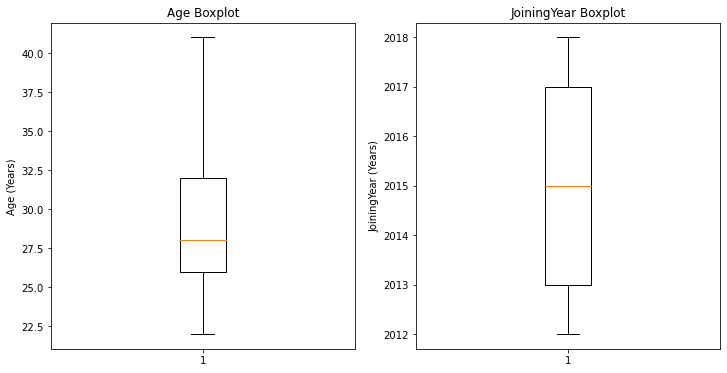

In [18]:
## Bochen
plt.figure(figsize=[12, 6])
plt.subplot(121)
plt.boxplot(x=data['Age'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')


plt.subplot(122)
plt.boxplot(x=data['JoiningYear'])
plt.title('JoiningYear Boxplot')
plt.ylabel('JoiningYear (Years)')

plt.show()

<AxesSubplot:xlabel='Education', ylabel='LeaveOrNot'>

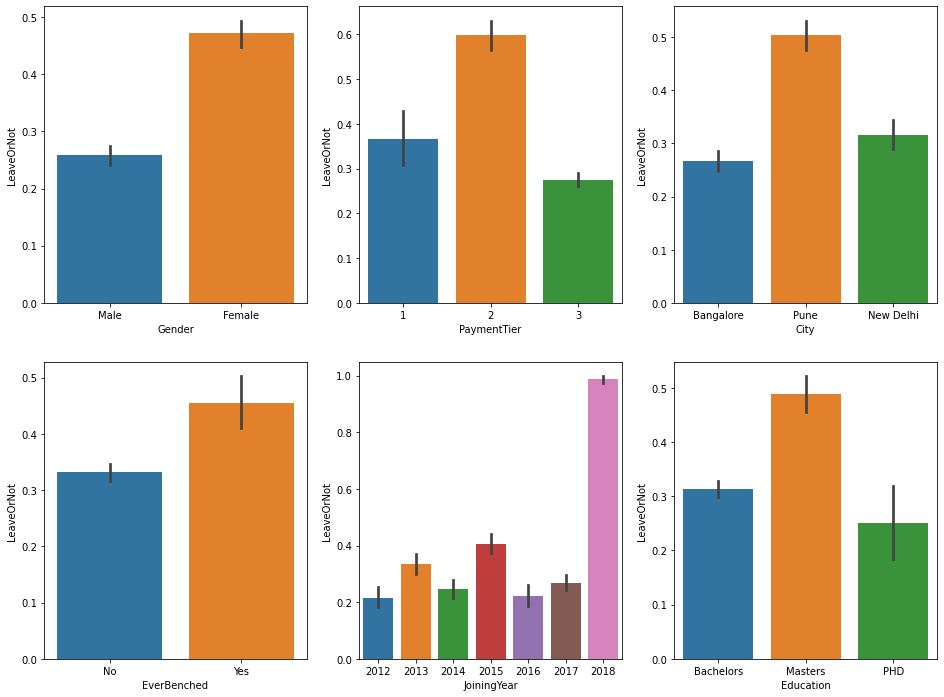

In [22]:
## Bochen
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x="Gender", y="LeaveOrNot", data=data, ax = saxis[0,0])
sns.barplot(x = 'PaymentTier', y = 'LeaveOrNot', data=data, ax = saxis[0,1])
sns.barplot(x="EverBenched", y="LeaveOrNot", data=data, ax = saxis[1,0])

sns.barplot(x = 'City', y = 'LeaveOrNot', data=data, ax = saxis[0,2])
sns.barplot(x="JoiningYear", y="LeaveOrNot", data=data, ax = saxis[1,1])

sns.barplot(x="Education", y="LeaveOrNot", data=data, ax = saxis[1,2])

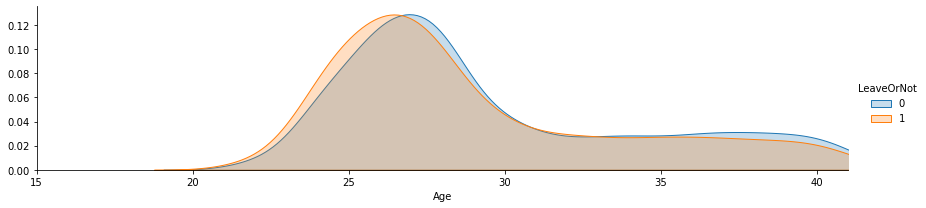

In [25]:
## Bochen
a = sns.FacetGrid( data, hue = 'LeaveOrNot', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(15 , data['Age'].max()))
a.add_legend()

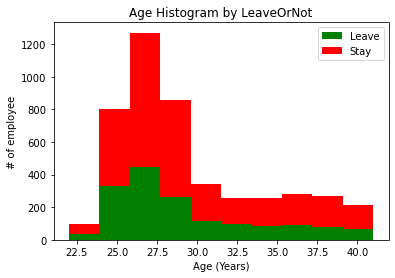

In [26]:
plt.hist(x = [data[data['LeaveOrNot']==1]['Age'], data[data['LeaveOrNot']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Leave','Stay'])
plt.title('Age Histogram by LeaveOrNot')
plt.xlabel('Age (Years)')
plt.ylabel('# of employee')
plt.legend()
plt.show()

In [15]:
X = data.drop(['LeaveOrNot'], axis='columns')
y = data.LeaveOrNot

# 4. Model the data

Intercept [-0.00600626] 
Coefficients: [[ 5.51509905e-04 -3.23739371e-01 -2.29039077e-02 -2.59082222e-02
   8.41355136e-01 -8.98177077e-02 -3.12994839e-01  6.93904441e-01
  -8.92364533e-01  6.96909792e-01]]
 tp: 288 
 tn: 1098 
 fp: 117 
 fn: 359 
 Accuracy(Score): 0.7443609022556391
 tp: 219 
 tn: 833 
 fp: 101 
 fn: 243 
 Accuracy(Score): 0.7535816618911175


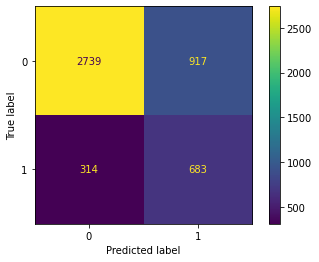

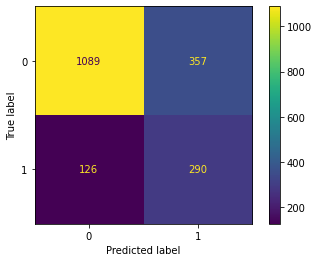

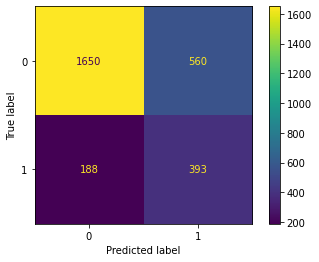

In [16]:
# Jiayi Zhang Logistic Regression
dflr = LogisticRegression(penalty='none',max_iter=10000)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

dflr = dflr.fit(Xtrain,ytrain)

print(f"Intercept {dflr.intercept_} \nCoefficients: {dflr.coef_}")

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = dflr.fit(Xtrain3,ytrain3)
ypr3 = dflr3.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = dflr.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = dflr.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = dflr.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()

 tp: 290 
 tn: 1089 
 fp: 126 
 fn: 357 
 Accuracy(Score): 0.7406015037593985
 tp: 218 
 tn: 883 
 fp: 51 
 fn: 244 
 Accuracy(Score): 0.7886819484240688


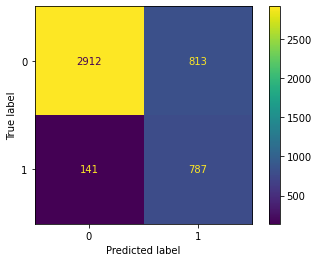

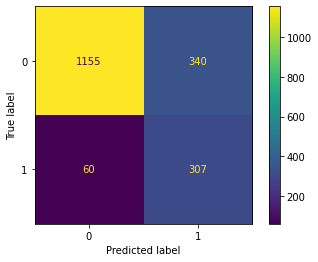

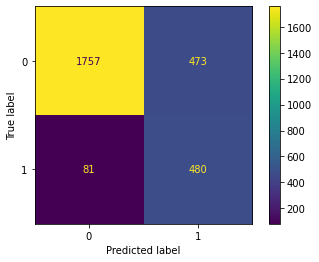

In [17]:
# Jiayi Zhang KNN
knn = KNeighborsClassifier(n_neighbors = 14)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=80)

knn = knn.fit(Xtrain,ytrain)

ypr = dflr.predict(Xtest)

# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[1]))
tn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[0]))
fp = sum(np.logical_and(ypr == dflr.classes_[1], ytest == dflr.classes_[0]))
fn = sum(np.logical_and(ypr == dflr.classes_[0], ytest == dflr.classes_[1]))
acc = (tp + tn) / (tp + tn + fp + fn)
print(" tp:", tp, "\n","tn:",tn, "\n", "fp:", fp, "\n", "fn:", fn, "\n", "Accuracy(Score):", acc )

# When test size is 0.3
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X, y, test_size=0.3, random_state=80)
dflr3 = knn.fit(Xtrain3,ytrain3)
ypr3 = knn.predict(Xtest3)
# Calculate the accuracy(Score),True Positives (TP), True Negatives (TN), False Negatives (FN), and False Positives (FP) 
tp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[1]))
tn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[0]))
fp3 = sum(np.logical_and(ypr3 == dflr3.classes_[1], ytest3 == dflr3.classes_[0]))
fn3 = sum(np.logical_and(ypr3 == dflr3.classes_[0], ytest3 == dflr3.classes_[1]))
acc3 = (tp3 + tn3) / (tp3 + tn3 + fp3 + fn3)
print(" tp:", tp3, "\n","tn:",tn3, "\n", "fp:", fp3, "\n", "fn:", fn3, "\n", "Accuracy(Score):", acc3 )

#plot confusion metrix for all data
yall = knn.predict(X)
conf = confusion_matrix(yall,y)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for test data
yte = knn.predict(Xtest)
conf = confusion_matrix(yte,ytest)
ConfusionMatrixDisplay(conf).plot()
plt.show()

#plot confusion metrix for train data
ytr = knn.predict(Xtrain)
conf = confusion_matrix(ytr,ytrain)
ConfusionMatrixDisplay(conf).plot()
plt.show()